GoingDeeper-NLP 11. 기계 번역이 걸어온 길
===

번역 모델이 발전해 온 과정을 살펴보고, 번역을 생성하는 여러 가지 방법을 소개합니다. 자연어 처리에서 DATA Augmentation을 어떻게 할 수 있는지, 자연어 처리 성능은 어떻게 측정할 수 있는지 알아봅니다. 기계 번역과 뗄 수 없는 챗봇도 간단히 공부합니다.

[학습 목표]
1. 번역 모델이 발전해 온 과정을 살펴본다.
2. 번역을 생성하는 여러 가지 방법을 이해한다.
3. 주어진 데이터로 더 높은 성능을 만들어 내는 법을 배운다.
4. 자연어 처리의 성능을 측정하기 위한 지표를 배운다.

[학습 목차]
- 11-2. 번역의 흐름 | 25분
- 11-3. 지적 생성을 위한 넓고 얕은 탐색 (1) Greedy Decoding 
- 11-4. 지적 생성을 위한 넓고 얕은 탐색 (2) Beam Search 
- 11-5. 지적 생성을 위한 넓고 얕은 탐색 (3) Sampling 
- 11-6. 방과 후 번역 수업 (1) Data Augmentation 
- 11-7. 방과 후 번역 수업 (2) Lexical Substitution 
- 11-8. 방과 후 번역 수업 (3) Back Translation 
- 11-9. 방과 후 번역 수업 (4) Random Noise Injection 
- 11-10. 채점은 어떻게? 
- 11-11. 실례지만, 어디 챗씨입니까? (1) 챗봇과 번역기 
- 11-12. 실례지만, 어디 챗씨입니까? (2) 좋은 챗봇이 되려면 
- 11-13. 실례지만, 어디 챗씨입니까? (3) 대표적인 챗봇 

# 11-2. 번역의 흐름

## 규칙 기반 기계 번역

나는이라는 어절을 어떻게 번역할 수 있을까요? 아마 백이면 백 I am 또는 I'm 이라고 번역을 할 겁니다. 그렇다면 너는은 어떻죠? You am이라고 번역하실 분은 설마 없겠죠? You are이나 You're로 번역하는 것이 맞습니다!
    
나 + 는과 너 + 는 모두 는을 포함하는데, 영문에서는 는 이 am 과 are로 나뉘는 것을 알 수 있습니다. 그러니 는 = am 이라고 정의할 수도, 는 = are 이라고 정의할 수도 없죠. 먼저 등장하는 단어가 나 인지 너 인지에 따라 분기를 나눠줘야 하는 거예요.

이처럼 번역할 때 경우의 수를 직접 정의해 주는 방식이 **규칙 기반 기계 번역(RBMT, Rule-Based Machine Translation)** 입니다. 이 수많은 규칙들은 모두 언어학을 기반으로 하기 때문에, 개발 과정에 언어학자가 동반되어야만 했어요.
    
다음은 첫 성과가 난 규칙 기반 기계 번역입니다. 1954년, 미국의 조지타운대와 IBM이 직접 정의한 언어 규칙을 통해 60개의 러시아어 문장을 영어로 번역하는 데에 성공합니다! 
- [[역사 속 사진] 1954년 1월 7일, 기계 번역의 역사를 만든 '조지타운-IBM 실험' 시연](https://m.blog.naver.com/newheater/221763031420)

## 통계적 기계 번역

단점이 명확한 규칙 기반 기계 번역을 개선하고자 하는 시도는 당연히 존재했으며, 아무래도 그것은 직접 구현해 본 쪽이 유리했나 봅니다. 1988년에 IBM이 Model 1을 통해 새로운 번역 방식을 선보였죠. 수많은 데이터로부터 통계적 확률을 구해 번역을 진행하는 통계적 기계 번역(SMT, Statistical Machine Translation) 이 바로 그것입니다.
    
통계적 기계 번역은 통계적 언어 모델을 기반으로 동작합니다. 
- [위키독스: 통계적 언어 모델](https://wikidocs.net/21687)
    
"문장이 존재할 확률을 측정한다." 뭔가 멋진 개념을 담은 언어 모델이죠? 통계적 언어 모델을 활용한 SMT는 과연 어떻게 동작하는 걸까요? 번역은 자연스러운 문장을 생성하는 것뿐만 아니라 번역문의 문법 구조도 고려해야 하기 때문에 단순히 P(Target | Source) 만을 고려해서는 안 된답니다. 원문과 번역문, 각 단어 간의 매핑 관계를 추가로 고려해야 하는데, 그 관계를 **정렬(Alignment)** 이라고 부릅니다.

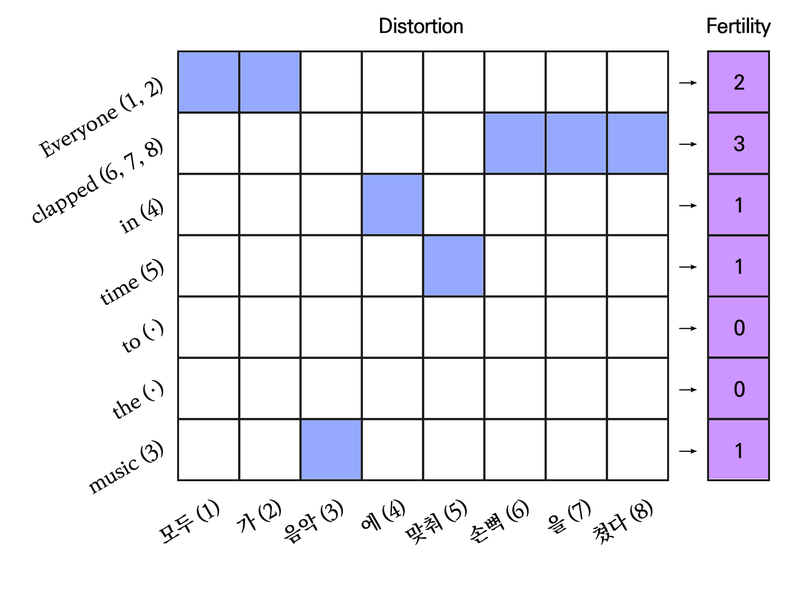

정렬에는 퍼틸리티(Fertility) 와 왜곡(Distortion), 두 가지 요소가 포함됩니다.

**퍼틸리티**는 직역하면 '출생률' 정도 되는 뜬금없는 의미를 갖고 있는데요, 원문의 각 단어가 번역 후에 몇 개의 단어로 나타나는지를 의미하는 값입니다. 위 예를 따르면 Everyone의 퍼틸리티는 2이고, Clapped 의 퍼틸리티는 3입니다. 그리고 to, the 의 퍼틸리티는 0이죠! 번역에 직접적으로 등장하지 않는다는 의미입니다. 퍼틸리티에 대한 확률은 p(n|w) 로 정의되며 n은 퍼틸리티 값, w는 원문의 단어입니다. music 은 높은 확률로 음악 으로만 번역될 테니 p(1|music) = 0.9 정도로 표현할 수 있겠죠?

**왜곡**은 원문의 단어가 번역문에서 존재하는 위치를 나타냅니다. 위의 예에서 Clapped는 손뼉(6) 을(7) 쳤다(8) 로 번역되므로 Clapped의 왜곡은 (6, 7, 8)로 나타납니다. 왜곡에 대한 확률은 p(t|s, l) 로 정의되며 t은 번역문에서 각 단어의 위치, s는 원문에서 각 단어의 위치, 그리고 l은 번역문의 길이입니다. Everyone(1) 으로 시작하는 문장은 모두(1) / 가(2) 라고 번역될 확률이 높으니 p(1|1, 8) x p(2|1, 8) 역시 제법 높을 것을 추측할 수 있습니다.
    
통계적 언어 모델에서 파생된 확률에 위 모든 확률을 곱하여 학습하는 것이 바로 통계적 기계 번역입니다.
    
이에 발맞춰 두 단어 이상으로 정렬을 구하는 구문 기반 번역(PBMT, Phrase Based Machine Translation)이 등장하여 꽤나 최근인 2006년까지도 사용되었습니다. 또 규칙 기반 번역과 결합하여 하이브리드로 사용된 사례도 있죠!

## 신경망 기계 번역

하지만 모든 기업을 단 하나로 수렴하게 만드는 끝판왕이 등장하게 됩니다.
예상하셨겠지만 그것이 바로 신경망 기계 번역(Neural Machine Translation) 입니다. seq2seq나 transformer는 신경망 기계 번역에 활용되는 대표적인 모델들이죠! 지금부터 배울 것은 그다음의 이야기예요!

# 11-3. 지적 생성을 위한 넓고 얕은 탐색 (1) Greedy Decoding

In [1]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)

    end_token = tokenizer.word_index["<end>"]

    while True:
        predict = model(test_tensor)
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1]

        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)

        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

이 함수는 훈련시킨 모델이 문장을 생성할 수 있게 해주는 함수입니다. 우리가 주목해야 하는 부분은 바로 단어를 결정하는 부분입니다!
- predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1]

바로 이 부분인데요, 모델이 예측한 predict 값을 Softmax를 통해 확률값으로 변환한 후, 가장 높은 확률을 갖는 단어가 다음 단어로 결정되는 순간이죠! 아주 직관적인 개념이기에 별다른 언급이 없이 "음~ 그렇구나~" 하고 넘어갔지만, 이는 엄연히 **탐욕 알고리즘(Greedy Algorithm)** 이 사용된 거랍니다. 탐욕적인 방법으로 문장을 Decoding 하니 기계 번역에서는 이를 **Greedy Decoding**이라고 칭합니다.

- [[알고리즘] Greedy Algorithm (탐욕 알고리즘)](https://janghw.tistory.com/entry/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-Greedy-Algorithm-%ED%83%90%EC%9A%95-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)

탐욕적인 방법은 효율적이지만 최적의 해를 구해준다는 보장이 없습니다. 즉 우리는 지금 최고의 번역을 생성하고 있는 것이 아닌 거죠! 

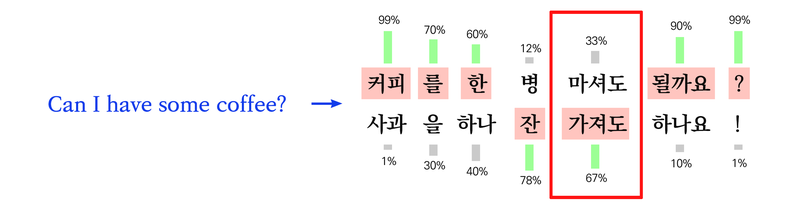

앞서 통계적 기계 번역 파트에서 배운 것처럼 우리는 문장이 존재할 확률을 구할 수 있죠? 실제 세계에선 굳이 계산해 보지 않더라도 커피를 한 잔 가져도 될까요? 보다 커피를 한 잔 마셔도 될까요? 가 높은 확률로 존재할 것을 예상할 수 있습니다. 하지만 훈련 데이터가 실제 세계의 모든 데이터를 포함할 수는 없기 때문에, have 가 마시다 로 사용되는 경우가 훈련 데이터에 적거나 없었다면 탐욕적인 방법은 have 를 가장 높은 확률을 갖는 가지다 로 번역할 수밖에 없었을 겁니다. 실제 세계에서는 높은 확률로 존재하는 문장이지만 훈련 데이터 세계에서는 커피를 가지는 게 더 타당하다는 거죠!

이를 어떻게 해결할 수 있을까요? 단어 사전으로 만들 수 있는 모든 문장을 만든 후, 실제 세계에 존재하는 우리가 직접 고르는 방법은 어떤가요? 확실히 가장 멋진 문장을 골라낼 수는 있을 것 같습니다. 1,000개의 단어를 갖는 사전으로 3개 단어 문장 하나를 만드는 데에 1,000,000,000개 문장이 서비스로 온다는 것은 조금 문제일 수도 있지만요!

# 11-4. 지적 생성을 위한 넓고 얕은 탐색 (2) Beam Search

Beam Search 는 단어 사전으로 만들 수 있는 모든 문장을 만드는 대신, 지금 상황에서 가장 높은 확률을 갖는 Top-k 문장만 남기는 것 입니다. 

[Beam Size를 2로 하는 Beam Search]
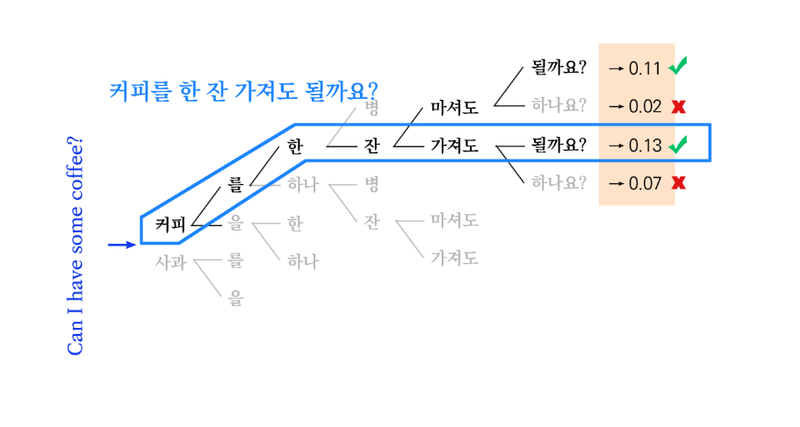

In [1]:
import math
import numpy as np

def beam_search_decoder(prob, beam_size):
    sequences = [[[], 1.0]]  # 생성된 문장과 점수를 저장

    for tok in prob:
        all_candidates = []

        for seq, score in sequences:
            for idx, p in enumerate(tok): # 각 단어의 확률을 총점에 누적 곱
                candidate = [seq + [idx], score * -math.log(-(p-1))]
                all_candidates.append(candidate)

        ordered = sorted(all_candidates,
                         key=lambda tup:tup[1],
                         reverse=True) # 총점 순 정렬
        sequences = ordered[:beam_size] # Beam Size에 해당하는 문장만 저장 

    return sequences

In [2]:
vocab = {
    0: "<pad>",
    1: "까요?",
    2: "커피",
    3: "마셔",
    4: "가져",
    5: "될",
    6: "를",
    7: "한",
    8: "잔",
    9: "도",
}

prob_seq = [[0.01, 0.01, 0.60, 0.32, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
            [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.75, 0.01, 0.01, 0.17],
            [0.01, 0.01, 0.01, 0.35, 0.48, 0.10, 0.01, 0.01, 0.01, 0.01],
            [0.24, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.68],
            [0.01, 0.01, 0.12, 0.01, 0.01, 0.80, 0.01, 0.01, 0.01, 0.01],
            [0.01, 0.81, 0.01, 0.01, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01],
            [0.70, 0.22, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
            [0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
            [0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
            [0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]

prob_seq = np.array(prob_seq)
beam_size = 3

result = beam_search_decoder(prob_seq, beam_size)

for seq, score in result:
    sentence = ""

    for word in seq:
        sentence += vocab[word] + " "

    print(sentence, "// Score: %.4f" % score)

커피 를 가져 도 될 까요? <pad> <pad> <pad> <pad>  // Score: 42.5243
커피 를 마셔 도 될 까요? <pad> <pad> <pad> <pad>  // Score: 28.0135
마셔 를 가져 도 될 까요? <pad> <pad> <pad> <pad>  // Score: 17.8983


# 11-5. 지적 생성을 위한 넓고 얕은 탐색 (3) Sampling

Sampling은 지금까지 확률을 기준으로 단어를 선택해왔으니, 확률적으로 단어를 뽑는 방법입니다. 언어 모델은 반복적으로 다음 단어에 대한 확률 분포를 생성하기 때문에 그 확률 분포를 기반으로 랜덤하게 단어를 뽑아 보자는 거죠.
     

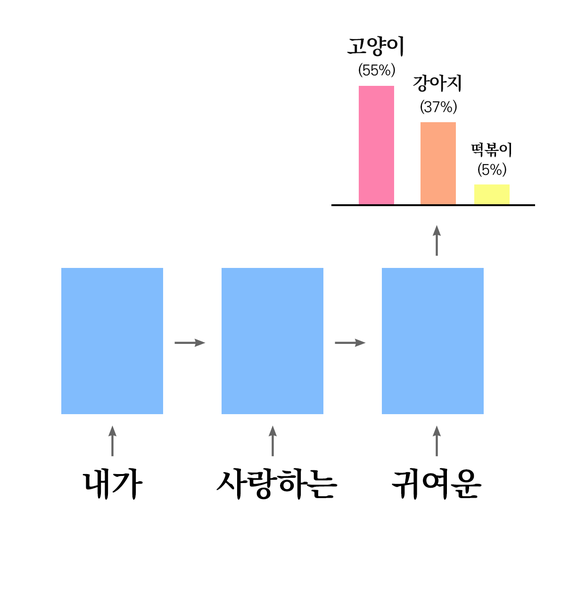

위 예시를 따라서 100문장을 만들면 이상적인 경우 55개의 내가 사랑하는 귀여운 고양이, 37개의 내가 사랑하는 귀여운 강아지... 와 같이 문장이 생성되는 겁니다. 높은 확률을 갖는 단어를 택하는 경우가 가장 많기 때문에 랜덤이지만 지나치게 뜬금없는 문장이 생성되지는 않겠죠?
    
Sampling은 간혹 정말 난해한 문장을 생성할 수도 있기 때문에 실제 서비스에서는 거의 사용되지 않습니다. 대신 모델을 학습시킬 때 사용되는 경우가 있는데요,  Back Translation(역번역) 이 대표적인 사례입니다. 또한 강화 학습의 입실론 그리디(E-Greedy)와도 궤를 함께하기 때문에 자연어 처리에 강화 학습을 적용한 경우에 등장하기도 한답니다!

# 11-6. 방과 후 번역 수업 (1) Data Augmentation

Data Augmentation은 '데이터 증가', '데이터 확대' 등으로 직역되며 훈련 데이터를 수십 배까지도 부풀리는 기술을 의미합니다! 주로 이미지 처리 영역에서 많이 사용됩니다. 

[Data Augmentation 종류]
- 좌우 반전 (Flipping과 중복): 이미지를 좌우로 반전시킨다.
- Crop: 이미지의 특정 부분을 잘라낸다.
- 밝기 조절: 이미지의 밝기를 변화시킨다.
- Rotation: 이미지를 0 ~ 360도 회전시킨다.
- Shifting: 이미지를 약 10px 움직인다. 끝단이 잘려 나가는 효과가 있다.
- Rescaling: 이미지를 1.0 ~ 1.6배 키운다.
- Flipping: 이미지를 상하 / 좌우 반전을 한다.
- Shearing: 약 -20 ~ 20도 정도로 이미지를 찌그러트린다.
- Stretching: 이미지를 가로 / 세로 약 1.0 ~ 1.3배 늘린다.


어떤 변화를 시켜도 왜곡이 크지 않고 심지어 일괄적으로 처리할 수 있다는 장점이 있습니다. 

# 11-7. 방과 후 번역 수업 (2) Lexical Substitution

Lexical Substitution은 '어휘 대체'로 직역됩니다. 

## 동의어 기반 대체

시소러스(Thesaurus)란, 어떤 단어의 동의어나 유의어를 집중적으로 구축해놓은 사전을 의미합니다. 동의어 기반 대체는 이 시소러스를 활용한 방법입니다. 대표적인 시소러스인 워드넷(WordNet)을 잘 다룬 글을 첨부합니다!
- [시소러스를 활용한 단어 의미 파악](https://kh-kim.gitbook.io/natural-language-processing-with-pytorch/00-cover-4/03-wordnet)

위 방식을 통해 Augmentation을 하면 아래와 같은 느낌이 되겠죠?
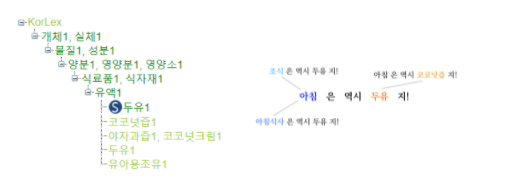

동의어를 기반으로 대체하는 것은 아주 좋은 방법이지만, 규칙 기반 기계 번역처럼 모든 것을 사람이 정의해야 한다는 것이 단점입니다. 조금 더 편리한 방법은 없을까요?

## Embedding 활용 대체

Pre-training Word Embedding을 활용하는 방법이 바로 그것입니다. 우리는 이미 Word2Vec이나 GloVe 등의 기법들을 배웠죠. 이 기법들을 통해 학습된 Embedding은 유사한 단어들끼리 비슷한 공간에 밀집되던 것을 기억하실 겁니다. 사람이 일일이 정의한 데이터베이스 대신, 이 Embedding의 유사도를 기반으로 단어를 대체하면 훨씬 편리하겠죠!    

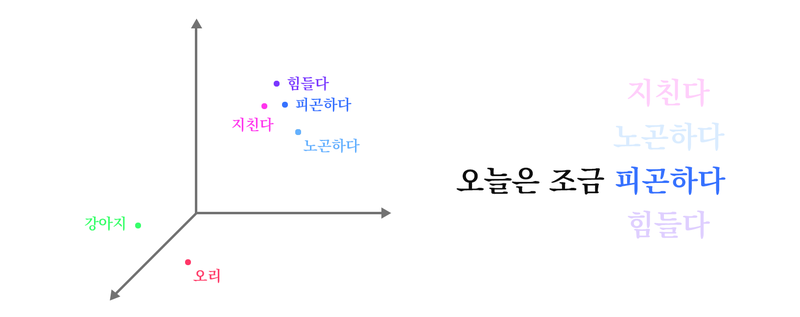

gensim 라이브러리를 활용하면 이 방법은 아주 쉽게 사용할 수 있겠어요! 단어를 유사도 순으로 정렬해 보여주는 most_similar() 함수, 알고 계시지요?

## TF-IDF 기반 대체

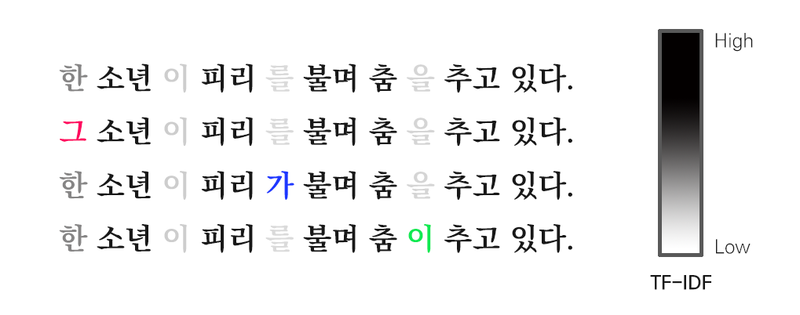

TF-IDF는 여러 문서를 기반으로 단어마다 중요도를 부여하는 알고리즘입니다. 문서의 핵심이 되는 소년, 피리 같은 단어들은 높은 TF-IDF 값을 부여받고, 한, 를과 같은 단어들은 낮은 TF-IDF 값을 가지게 됩니다. 이때, 낮은 TF-IDF 값을 갖는 단어들은 핵심 단어가 아니기 때문에 다른 단어로 대체해도 문맥이 크게 변하지 않는다는 것에 주목한 아이디어입니다.

# 11-8. 방과 후 번역 수업 (3) Back Translation

Back Translation은 단일 언어 데이터는 구하기 쉽고 많지만 병렬 쌍을 이룬 언어 데이터를 찾기는 어렵다는 문제를 해결하고자 등장했습니다. 번역 모델에 단일 언어 데이터를 학습시키는 방법이죠!
      
Sequence-to-Sequence의 구조를 되새겨보면, Source 문장을 Encoding 하는 부분과 Target 문장을 Decoding 하는 부분을 분리하여 모듈들이 각 언어를 더 잘 처리할 수 있게 했었습니다. 그렇다면 Encoder에는 Source 언어로 된 문장을, Decoder에는 Target 언어로 된 문장을 좀 더 훈련시키면 어떨까요? 
- [Back Translation 정리](https://dev-sngwn.github.io/2020-01-07-back-translation/)
     
Synthetic Source Sentence (Back Translation)
- 아무런 정보도 담고 있지 않은 null 토큰을 입력으로 주느니, 완벽하지는 않더라도 Target Sentence를 보고 인공적인 Source Sentence를 만드는 방법론이다. 생성된 인공 데이터를 Synthetic Source Sentence라 칭한다. 그리고 인공 데이터를 생성하는 과정을 Back Translation이라 정의하며, 그 과정을 다음과 같이 표현하고 있다.    
    i.e. an automatic translation of the monolingual target text into the source language.    
    (즉, 단일 타겟 언어 문장을 소스 언어 문장으로 자동 번역하는 과정이다.)

# 11-9. 방과 후 번역 수업 (4) Random Noise Injection

데이터에 포함된 적당한 노이즈는 때때로 학습에 도움이 되기도 합니다. 그런 의미에서 문장에 노이즈를 주는 것도 괜찮은 Augmentation 기법이 될 수 있겠죠

## 오타 노이즈 추가

채팅 중 ㅋㅋㅋㄱㄱㅋㅋㄱ 와 ㅋㅋㅌㅋㅌㅌㅋㅋ 를 보고 뭘 알아낼 수 있을까요? 바로 상대방이 사용하는 키보드 자판입니다! 전자는 천지인 자판을 쓰고 있고 후자는 QWERTY 자판을 쓰고 있네요.
    
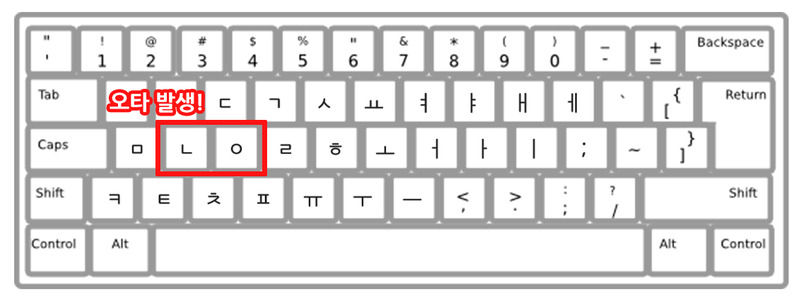

타이핑을 할 때 주변 키가 눌려 발생하는 오타는 굉장히 자연스럽습니다. 이를 이용한 Augmentation 기법이 바로 오타 노이즈를 추가하는 것이죠! 올 때 아이스크림 사와 를 놀 때 아이스크림 사와 로 바꾸는 등 QWERTY 키보드 상에서 키의 거리를 기반으로 노이즈를 추가하는 방법입니다!

## 공백 노이즈 추가

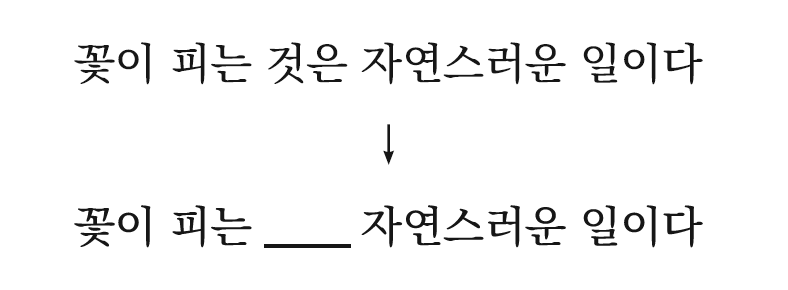

엄연히 말하면 완벽한 공백이 아니고, _ 토큰을 활용하며 이를 Placeholder Token(이하 공백 토큰)이라고 부릅니다. 문장의 일부 단어를 공백 토큰으로 치환하는데요, 학습의 과적합을 방지하는 데에 좋은 효과를 볼 수 있다고 합니다.

## 랜덤 유의어 추가

위 방식들은 노이즈 추가라고 칭했지만 대체로 문장의 의미를 유지하며 문장을 변환하는 형태였죠. 이 방식은 정말 노이즈를 추가합니다! 주어진 문장에서 불용어(Stop word)가 아닌 단어를 랜덤하게 뽑은 후, 해당 단어와 유사한 단어를 골라 문장에 아무렇게나 삽입하는 방식입니다.

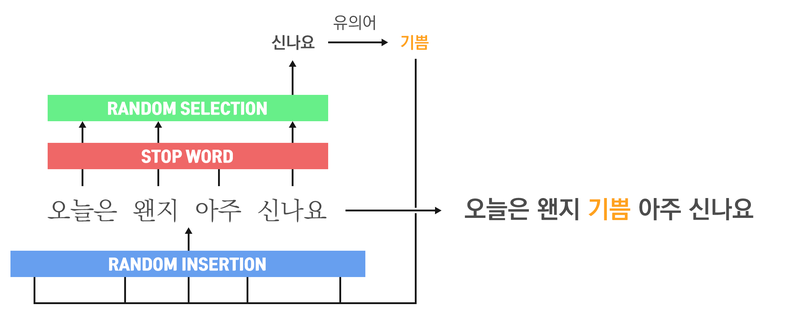

앞서 배운 Lexical Substitution과 비슷한 느낌이지만 원본 단어가 손실되지 않는다는 것이 조금 더 매력적이죠? Word2Vec의 아이디어를 생각하면 유사어를 삽입하는 것이 모델의 Embedding 층을 더 견고하게 만들어 줄 것 같네요!

11-10. 채점은 어떻게?
앞서 진행한 프로젝트에서도, Beam Search가 생성한 문장을 고를 때도, 우리는 번역을 직접 읽고 평가했습니다. 직접 읽어보고 '좋다', '나쁘다' 라고 판단하는 것은 그럴듯하지만 너무나도 주관적이죠. 게다가 번거로워요! 따라서 번역의 품질을 쉽고 빠르게 평가할 수 있는 객관적인 지표가 필요합니다. 
   
**BLEU(Bilingual Evaluation Understudy) Score**는 이에 발맞춰 등장한 번역 평가 지표입니다. '기계가 실제 번역을 얼마나 잘 재현했는가?' 를 평가하는 지표인데, '번역을 평가해야 한다!' 라는 연구자의 깊은 고민이 느껴지는 개념이니 아래 웹페이지들에서 자세한 내용을 알아보세요. 두 개의 글을 첨부해 드릴 테니, 앞의 글을 가볍게 읽으시고 그다음 글로는 자세한 이해를 하도록 합시다.
- 1. [BLEU Score](https://donghwa-kim.github.io/BLEU.html)

      
BLEU(Bilingual Evaluation Understudy)score란 성과지표로 데이터의 X가 순서정보를 가진 단어들(문장)로 이루어져 있고, y 또한 단어들의 시리즈(문장)로 이루어진 경우에 사용되며, 번역을 하는 모델에 주로 사용된다. 3가지 요소를 살펴보자.
- n-gram을 통한 순서쌍들이 얼마나 겹치는지 측정(precision)
- 문장길이에 대한 과적합 보정 (Brevity Penalty)
- 같은 단어가 연속적으로 나올때 과적합 되는 것을 보정(Clipping) 
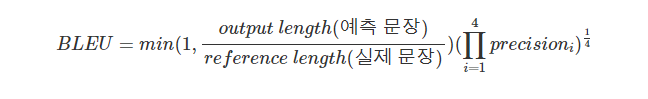


- 2. [BLEU Score(Bilingual Evaluation Understudy Score)](https://wikidocs.net/31695)

BLEU는 기계 번역 결과와 사람이 직접 번역한 결과가 얼마나 유사한지 비교하여 번역에 대한 성능을 측정하는 방법입니다. 측정 기준은 n-gram에 기반합니다.  BLEU는 PPL과는 달리 높을 수록 성능이 더 좋음을 의미합니다. 
- 단어 개수 카운트로 측정하기(Unigram Precision)
- 중복을 제거하여 보정하기(Modified Unigram Precision)
- 순서를 고려하기 위해서 n-gram으로 확장하기
- 짧은 문장 길이에 대한 패널티(Brevity Penalty)
    
기계 번역은 BLEU Score로 줄 세우기가 가능하다는 것을 알았습니다. 혹시 다른 Task에 대한 평가 지표도 궁금하지 않으신가요? 자연어 이해(Natural Language Understanding)에 관련된 최신 논문을 본 적이 있으시다면 GLUE 라는 것을 보셨을 거예요. GLUE는 기계 번역 너머의 자연어 이해를 평가하기 위해 고안된 지표입니다. 
- [GLUE: 벤치마크를 통해 BERT 이해하기](https://huffon.github.io/2019/11/16/glue/)

GLUE(General Language Understanding Evaluation) 벤치마크는 “강건하고 범용적인 자연어 이해 시스템의 개발”이라는 목적을 가지고 제작된 데이터셋입니다. 따라서 GLUE는 자연어 처리 모델을 훈련시키고, 그 성능을 평가 및 비교 분석하기 위한 데이터셋들로 구성되어 있습니다. 다양하고 해결하기 어려운 9개의 태스크 데이터셋으로 구성된 GLUE는 모델들의 자연어 이해 능력을 평가하기 위해 고안되었으며, 이제는 BERT와 같은 전이학습 모델들을 평가하기 위한 필수적인 벤치마크가 되었습니다.

# 11-11. 실례지만, 어디 챗씨입니까? (1) 챗봇과 번역기

조금 뜬금없지만 챗봇과 번역기는 같은 집안이랍니다! 본격적인 챗봇 얘기에 들어가기에 앞서, 개괄적으로 챗봇의 이모저모를 다룬 좋은 글을 하나 읽도록 하죠!

[[번역]챗봇을 위한 딥러닝 1. 개요](https://norux.me/56)

번역 모델을 챗봇에 적용하는 아이디어는 Sequence-to-Sequence에서 시작하는데요, 앞서 Back Translation을 설명할 때 사용한 문단을 인용하도록 하죠.
    
- Sequence-to-Sequence의 구조를 되새겨보면, Source 문장을 Encoding하는 부분과 Target 문장을 Decoding하는 부분을 분리하여 모듈들이 각 언어를 더 잘 처리할 수 있게 했었습니다. ... (하략)
    
챗봇은 사람과 대화를 하는 게 목적인 모델이죠? 그렇다면 질문만 하는 나라의 언어를 Source언어라고 하고 답변만 하는 나라의 언어를 Target 언어라고 한다면 Source 문장을 Target 문장으로 번역하는 행위가 곧 질문에 답하는 행위가 되는 셈이죠?! 물론 다양한 일상적인 대화도 이 같은 방법으로 학습이 가능하고요.
    
조금 더 자세하게 설명하자면, Encoder는 Source 문장을 읽고 이해한 내용을 추상적인 고차원 문맥 벡터로 압축합니다. Decoder는 Encoder가 만든 문맥 벡터를 바탕으로 Target 문장을 생성하죠. 이 과정은 **Source 언어의 Embedding 공간 속 문장을 Target 언어의 Embedding 공간으로 매핑**한다고 할 수 있습니다. 수많은 데이터로 학습하는 것은 그 과정을 더 잘 해내기 위함이죠!

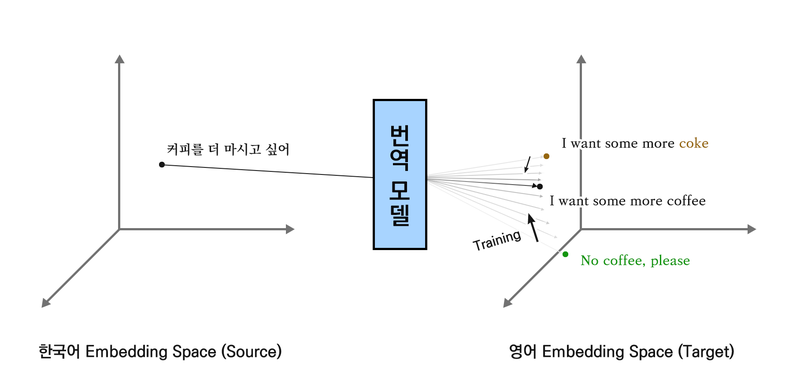

이것은 모든 Source 문장에 대해 매핑될 수 있는 고유한 Target 번역이 존재하기 때문에 가능합니다. 커피를 더 마시고 싶어 라는 문장을 영어로 올바르게 번역하는 경우의 수가 많아야 10개는 될까요? 그 모든 경우의 수 또한 I want some more coffee 에서 크게 엇나가지 않겠죠. 이처럼 사과는 무슨 색이야? 에 대한 답변도 빨간색입니다 에 수렴하기 때문에 번역기를 챗봇으로 사용하는 게 가능한 거죠!

# 11-12. 실례지만, 어디 챗씨입니까? (2) 좋은 챗봇이 되려면

대신 신경 써야 할 부분이 몇 가지 있습니다. 대표적인 4가지만 알아볼까요?

## 200ms

200ms는 대화가 자연스럽게 느껴지는 답변의 공백 마지노선입니다. 인간이 챗봇한테 말을 걸었을 때, 0.2초 이내에 답변이 나오는 것이 바람직하다는 거죠! 스마트폰에 탑재된 인공지능 비서는 가장 단순하게 생각해도 음성 인식, 답변 추론, 음성 생성까지 해야 하는데 0.2초면 제법 가혹하죠? 실제로는 10개 이상의 모듈이 동작하기 때문에 각 모듈에 0.01초 수준의 시간이 주어진다고 합니다. 

## 시공간을 담은 질문

거창한 제목이지만, 사실은 오늘 무슨 요일이야? 를 말하는 겁니다. 앞서 배운 것처럼 질문이 고유한 답변을 가진다면 챗봇이 학습하기 좋지만 요일을 묻는 질문은 매일 답변이 변하니 학습을 할 수가 없겠죠? 오늘 금천구 날씨 어때? 라고 묻는 것도 마찬가지입니다. 특정 시공간에 의해 결정되는 질문은 단순한 학습으로 답변할 수가 없어요. 그래서 보통은 질문의 의도를 파악한 후, 시공간에 대한 질문은 다른 모듈로 연결하여 예외 처리를 하곤 한답니다. 앞의 인공지능 비서가 왜 10개 이상의 모듈을 갖는지 조금 이해가 가죠?

## 페르소나
앞의 인용 글에서 인격의 일관성 (Coherent Personality)이라는 주제로 다뤄진 것과 유사한 얘기입니다. 학습에는 주로 많은 사람들의 채팅 데이터를 모아서 사용할 수밖에 없기 때문에 모델이 대답의 일관성을 갖는다는 것은 굉장히 도전적이죠. 이때의 일관성을 모델의 인격이라고 칭하며, 그것을 페르소나라고 부릅니다. 영화를 좋아하시는 분들이라면 한 번쯤 들어본 적이 있는 단어죠?

한 연구팀에서 페르소나에 대한 설명과 챗봇 적용 과정을 정리해 주었으니 가볍게 살펴볼까요?

- [챗봇UX 4편, 챗봇이 다른 서비스와 다른 점, 페르소나](https://doc.danbee.ai/blog_005_UX04_persona.html)

페르소나 : 제품 혹은 서비스를 사용할 만한 목표 인구 집단 안에 있는 다양한 사용자유형을 대표하는 가상의 인물을 말합니다.

## 대화의 일관성

챗봇이 페르소나를 가지는 것처럼, 사용자의 페르소나도 어딘가에 저장해놓고 적재적소에 사용한다면 정말 좋겠지만, 아직까지 사용자에 관한 정보를 기억하고 이를 활용하는 모델은 없어요. 대신 너무 뜬금없는 대답을 막아서 대화의 일관성을 유지하려는 시도는 있었죠. 이에 대한 재밌는 아이디어를 하나 소개해드릴게요! 지금 소개해 드릴 논문은 강화학습을 기반으로 하기 때문에 흥미 위주로 가볍게만 살펴보셔도 좋아요.
- [Deep Reinforcement Learning for Dialogue Generation](https://arxiv.org/pdf/1606.01541.pdf)



# 11-13. 실례지만, 어디 챗씨입니까? (3) 대표적인 챗봇

현재 가장 멋진 성능을 보여주고 있는 챗봇은 딥러닝 기반이에요! 대신 엄청난 규모의 데이터를 엄청난 크기의 모델에 학습시킨... 

## Meena
Meena는 구글이 만든 챗봇입니다. 거대하기로 빼놓으면 섭섭한 GPT-2보다 2배가량 큰 모델을 9배 더 많은 데이터로 학습한 친구예요! 모델 구조는 Evolved Transformer를 사용했답니다. 무엇보다 자체적인 대화 평가 지표인 SSA를 제안하고 이를 분석한 부분이 굉장히 인상적이에요. 
- [무슨 대화든 할 수 있는 에이전트를 향하여](https://brunch.co.kr/@synabreu/35)

## Blender
이후에 등장한 Facebook의 Blender도 못지않게 멋진 녀석입니다! 모델에 페르소나를 부여하고자 하는 시도와 자체적인 평가 지표 ACUTE-Eval을 제안한 것이 인상적이죠. 
- [[논문리뷰] 블렌더(Blender) - Facebook AI의 오픈 도메인 챗봇](https://littlefoxdiary.tistory.com/39)

